<a href="https://colab.research.google.com/github/parasgulati8/Fraud-Detection/blob/master/Anomaly_Detection_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
cd drive/'My Drive'/'Colab Notebooks'/dataset/

/content/drive/My Drive/Colab Notebooks/dataset


In [ ]:
!pip install pycaret

     |████████████████████████████████| 194kB 6.1MB/s 
     |████████████████████████████████| 63.9MB 52kB/s 
     |████████████████████████████████| 7.0MB 32.4MB/s 
     |████████████████████████████████| 1.2MB 42.6MB/s 
     |████████████████████████████████| 389kB 38.7MB/s 
     |████████████████████████████████| 133kB 44.8MB/s 
     |████████████████████████████████| 266kB 37.8MB/s 
     |████████████████████████████████| 3.0MB 38.5MB/s 
     |████████████████████████████████| 1.6MB 38.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 614kB 30.7MB/s 
     |████████████████████████████████| 6.2MB 22.5MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 552kB 42.7MB/s 
     |████████████████████████████████| 235kB 44.7MB/s 
     |████████████████████████████████| 2.1MB 24.3MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  4 13:25:04 2019

@author: paras
"""
dataset = pd.read_csv('creditcard.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 30].values

In [1]:
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'Class')

ModuleNotFoundError: ignored

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.999600,0.954700,0.788300,0.968600,0.863500,0.863300
1,CatBoost Classifier,0.999600,0.976600,0.808800,0.962600,0.874700,0.874500
2,Random Forest Classifier,0.999500,0.933200,0.767700,0.954300,0.847600,0.847400
3,Extreme Gradient Boosting,0.999500,0.978400,0.783800,0.945700,0.853000,0.852800
4,Linear Discriminant Analysis,0.999300,0.980400,0.734500,0.868700,0.792700,0.792400
5,Decision Tree Classifier,0.999200,0.898000,0.796300,0.767400,0.778300,0.777900
6,Ada Boost Classifier,0.999200,0.964300,0.697000,0.829600,0.752900,0.752500
7,Gradient Boosting Classifier,0.999200,0.803800,0.642300,0.851300,0.713800,0.713400
8,Logistic Regression,0.999100,0.918100,0.713700,0.734000,0.721700,0.721200
9,Ridge Classifier,0.999000,0.000000,0.481300,0.866700,0.611800,0.611300


(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

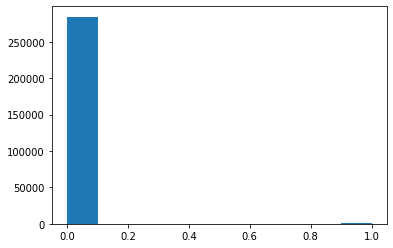

In [ ]:
plt.hist(y)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


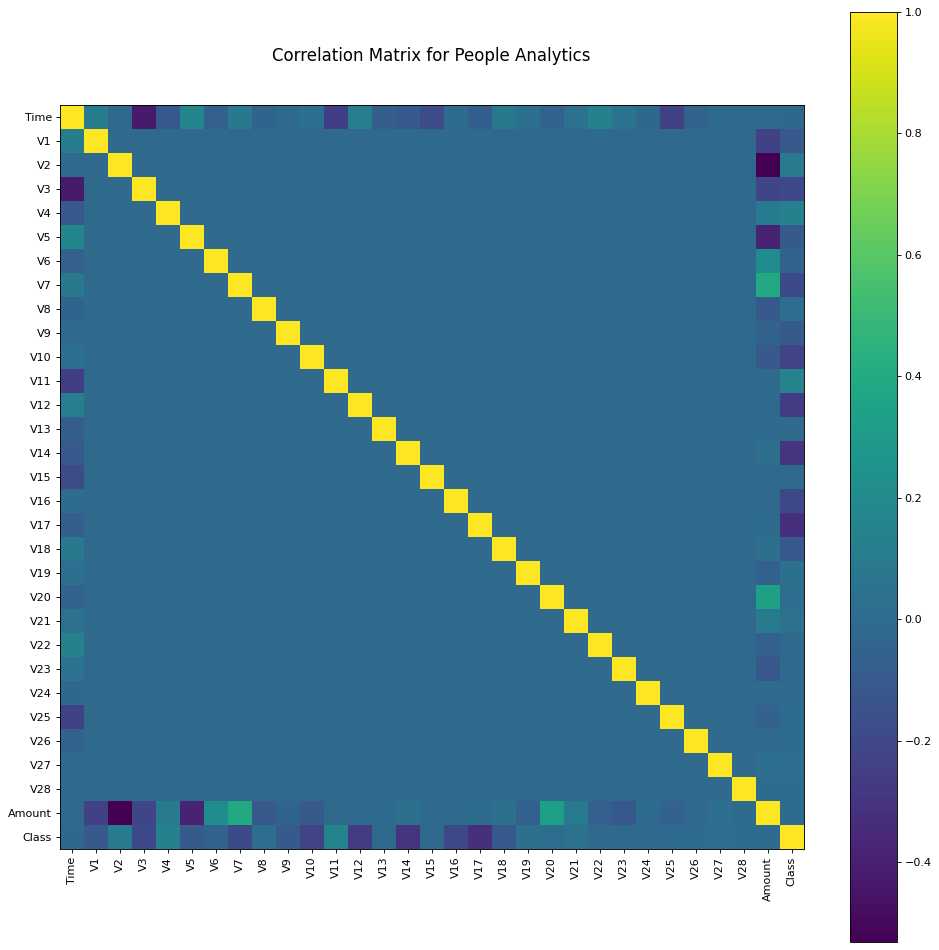

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    # print(df.columns)
    corr = df.corr()
    # print(corr)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(dataset, 15)

In [ ]:
def get_folds(X,y, k=5):
    return list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(X, y))

In [ ]:
folds = get_folds(X, y)
fold = folds[0]
X_train, X_test, y_train, y_test = X[fold[0]], X[fold[1]], y[fold[0]], y[fold[1]]

(array([227452.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

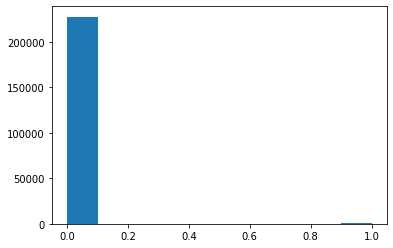

In [ ]:
plt.hist(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smote = SMOTE('minority')
X_train_sampled, y_train_sampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

(array([227452.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    393.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

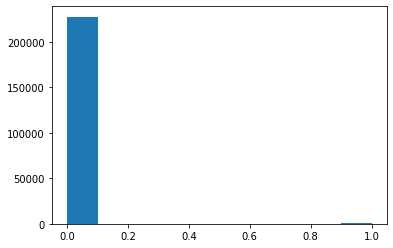

In [ ]:
plt.hist(y_train)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pd.Series(pca.explained_variance_ratio_)

0    0.999973
1    0.000027
dtype: float64

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

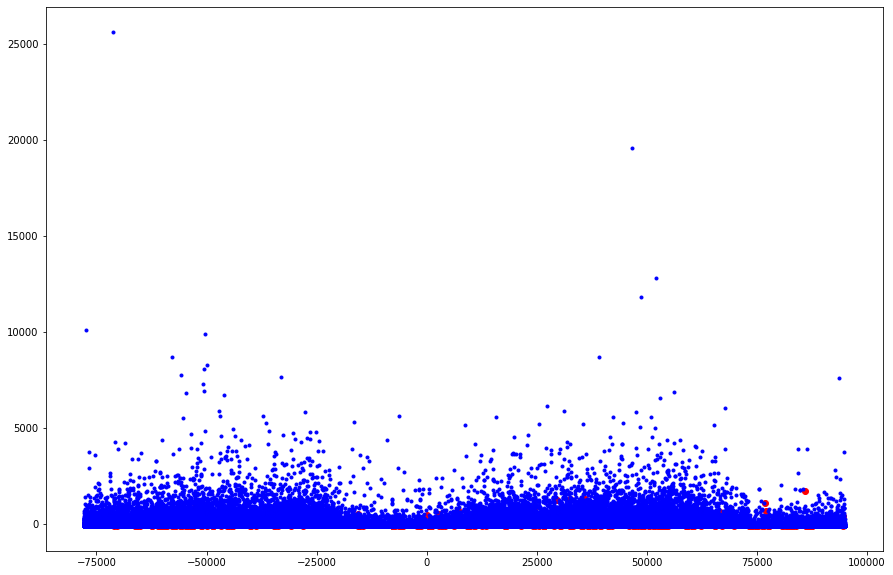

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_train_pca.iloc[np.where(y_train == 1)][0], X_train_pca.iloc[np.where(y_train == 1)][1], c = 'r', marker='o')
plt.scatter(X_train_pca.iloc[np.where(y_train == 0)][0], X_train_pca.iloc[np.where(y_train == 0)][1], c = 'b', marker='.')
plt.show()

In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
nlabels = len(np.unique(y_train))
weights_dict = { i: weights[i] for i in range(nlabels)}

In [ ]:
clf1 = LogisticRegression(C=0.1, class_weight=weights_dict, random_state=0)
clf2 = RandomForestClassifier(500, class_weight=weights_dict ,random_state=0)
clf3 = XGBClassifier(n_estimators=250, n_jobs=-1)
clf4 = GaussianNB()
clf5 = SVC(C=0.1, kernel='rbf',random_state=0, probability=True, class_weight=weights_dict)
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3), ('gnb', clf4), ('svc', clf5)], voting='soft')

clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print (confusion_matrix(y_test, y_pred))

target_names = [0,1]
print(classification_report(y_test, y_pred, target_names))

cohen_kappa_score(y_test, y_pred)

In [ ]:

# #separating positive examples
# positive_x = []
# positive_y = []
# negative_x = []
# negative_y = []
# for i in range(len(y)):
#     if y[i] == 1 :
#         positive_x.append(X[i])
#         positive_y.append(y[i])
#     else :
#         negative_x.append(X[i])
#         negative_y.append(y[i])

# #splitting dataset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#         negative_x, negative_y, test_size=0.2, random_state=42)

# #Adding the positive examples to test set
# X_test.extend(positive_x)
# y_test.extend(positive_y)

# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# #Calculating mean for each feature
# Mean_X_train = []
# for i in range(X_train.shape[1]):
#   Mean_X_train.append(X_train[:, i].mean()) 

# #Calculating standard deviation for each feature
# std_X_train = []
# for j in range(X_train.shape[1]):
#   std_X_train.append(np.std(X_train[:, j], axis=0)) 
  
# #Calculating the probability of each example in test set
# import math
# y_pred = []
# def norm(x, mean, std):
#     variance = float(std)**2
#     denom = (2*math.pi*variance)**.5
#     numer = math.exp(-(float(x)-float(mean))**2/(2*variance))
#     return numer/denom
  
  
# for i in range(len(X_test)):
#      p = 1
#      for j in range(len(Mean_X_train)):
#          p *= norm(X_test[i, j], Mean_X_train[j], std_X_train[j])
#      y_pred.append(p)


In [ ]:
# print ('Max probability', max(y_pred))
# print ('Min probability', min(y_pred))

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix

In [ ]:
# y_out = []
# for i in range(len(y_pred)):
#     if y_pred[i] < 9.914460408105776e-28 :
#         y_out.append(1) 
#     else:
#         y_out.append(0)
        
# #checking efficiency with confusion matrix
# print (confusion_matrix(y_test, y_out))
# print ('Precision Score = ', precision_score(y_test, y_out))
# print ('Recall Score = ', recall_score(y_test, y_out))
# print ('F1 Score = ', f1_score(y_test, y_out))

In [ ]:
# y_out = []
# for i in range(len(y_pred)):
#     if y_pred[i] < 9.914460408105776e-21:
#         y_out.append(1) 
#     else:
#         y_out.append(0)
        
# #checking efficiency with confusion matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_out)

In [ ]:
# #Calculating the probability of each exaple in training set
# import scipy.stats
# y_train_pred = []
# for i in range(len(X_train)):
#     p = 1
#     for j in range(len(Mean_X_train)):
#         p *= scipy.stats.norm(Mean_X_train[j], std_X_train[j]).pdf(X_train[i, j])
#     y_train_pred.append(p)

In [ ]:
# import statsmodels.formula.api as sm
# X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis =1)
# X_opt = X[:, :]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()

In [ ]:
# # Visualising the Training set results
# plt.scatter(X_train[:, 0], y_train, marker= 'x',color = 'red')
# plt.scatter(X_train[:, 0], y_train_pred, marker= '.', color = 'blue')
# plt.show()

# # Visualising the Test set results
# plt.scatter(X_test[:, 0], y_test, marker= 'x', color = 'red')
# plt.scatter(X_train[:, 0], y_train_pred, marker= '.', color = 'blue')
# plt.show()

In [ ]:
# # Visualising the Training set results
# plt.scatter(X_train[:, 1], y_train, color = 'red')
# plt.plot(X_train[:, 1], y_train_pred, color = 'blue')
# # plt.title('Salary vs Experience (Training set)')
# # plt.xlabel('Years of Experience')
# # plt.ylabel('Salary')
# plt.show()

# # Visualising the Test set results
# plt.scatter(X_test[:, 1], y_test, marker= 'x', color = 'red')
# plt.plot(X_train[:, 1], y_train_pred, color = 'blue')
# # plt.title('Salary vs Experience (Test set)')
# # plt.xlabel('Years of Experience')
# # plt.ylabel('Salary')
# plt.show()

In [ ]:
# # Visualising the Training set results
# plt.scatter(X_train[:, 2], y_train, marker= 'x',color = 'red')
# plt.scatter(X_train[:, 2], y_train_pred, marker= '.', color = 'blue')
# plt.show()

# # Visualising the Test set results
# plt.scatter(X_test[:, 2], y_test, marker= 'x', color = 'red')
# plt.scatter(X_train[:, 2], y_train_pred, marker= '.', color = 'blue')
# plt.show()

In [ ]:
# #Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)

In [ ]:
# Mean_X_train = []
# for i in range(len(X_train)):
#   Mean_X_train.append(X_train[i].mean()) 

In [ ]:
# std_X_train = []
# for j in range(len(X_train)):
#   std_X_train.append(np.std(X_train[j], axis=0)) 

In [ ]:
# import scipy.stats
# prob = []
# for k in range(len(Mean_X_train)):
  
#   l = scipy.stats.norm(Mean_X_train[k], std_X_train[k]).pdf(k)
#   prob.append(l)

In [ ]:
# MAX_X = []
# MIN_X = []
# for i in range(len(X_train)):
#   MAX_X.append(max(X_train[i]))
#   MIN_X.append(min(X_train[i])) 

In [ ]:
# X_grid = np.arange(MIN_X, MAX_X, 0.01)
# len(MAX_X)

In [ ]:
# len(y_test)